In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [18]:
data = pd.read_csv('./全部数据/附件1-区域15分钟负荷数据.csv', parse_dates=['数据时间'], index_col=[0])
daily_change = pd.read_csv('./未来十天日功率波动预测值.csv', index_col=0, parse_dates=['数据时间'])
day_mean = pd.read_csv('./未来十天日平均功率预测值.csv', index_col=0, parse_dates=['数据时间'])

In [20]:
print(daily_change)
print(day_mean)

                        总有功功率（kw）
数据时间                             
2021-09-01 00:00:00 -28552.948713
2021-09-01 00:15:00 -10857.673577
2021-09-01 00:30:00 -28424.626957
2021-09-01 00:45:00 -28288.165888
2021-09-01 01:00:00 -28846.362547
...                           ...
2021-09-10 22:45:00 -18425.624966
2021-09-10 23:00:00 -19506.678394
2021-09-10 23:15:00  -4125.784173
2021-09-10 23:30:00 -20625.846901
2021-09-10 23:45:00 -21772.338912

[960 rows x 1 columns]
                总有功功率（kw）
数据时间                     
2021-09-01  232911.338319
2021-09-02  233385.736710
2021-09-03  232970.831293
2021-09-04  228504.715252
2021-09-05  223649.930655
2021-09-06  231071.241739
2021-09-07  232455.230434
2021-09-08  232181.404010
2021-09-09  232155.256459
2021-09-10  231209.621813


In [5]:
predict_ls = [day_mean.values[:,0][i] + daily_change.values[:,0][96*i+j] for i in range(10) for j in range(96)]

In [6]:
predict = pd.DataFrame(predict_ls, index=daily_change.index, columns=['总有功功率（kw）'])

In [7]:
predict

,总有功功率（kw）
数据时间,
2021-09-01 00:00:00,204358.389606
2021-09-01 00:15:00,222053.664742
2021-09-01 00:30:00,204486.711362
2021-09-01 00:45:00,204623.172431
2021-09-01 01:00:00,204064.975772
...,...
2021-09-10 22:45:00,212783.996848
2021-09-10 23:00:00,211702.943419
2021-09-10 23:15:00,227083.837640


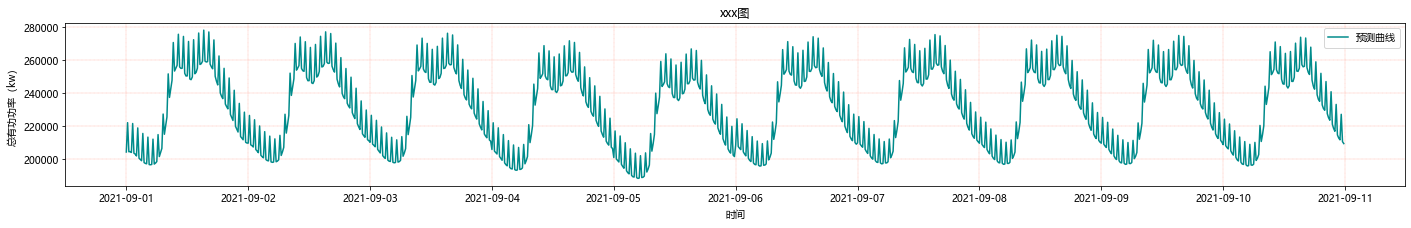

In [24]:
plt.rcParams['font.sans-serif'] = ['Microsoft Yahei']
plt.figure(figsize=(24,3))
plt.grid(color = 'tomato', linestyle = '--', linewidth = 0.25)
plt.title('xxx图')
plt.ylabel('总有功功率（kw）')
plt.xlabel('时间')
plt.plot(predict, color='darkcyan', label='预测曲线')
plt.legend()
# plt.savefig('每日功率波动曲线去除异常值前后对比图.svg')

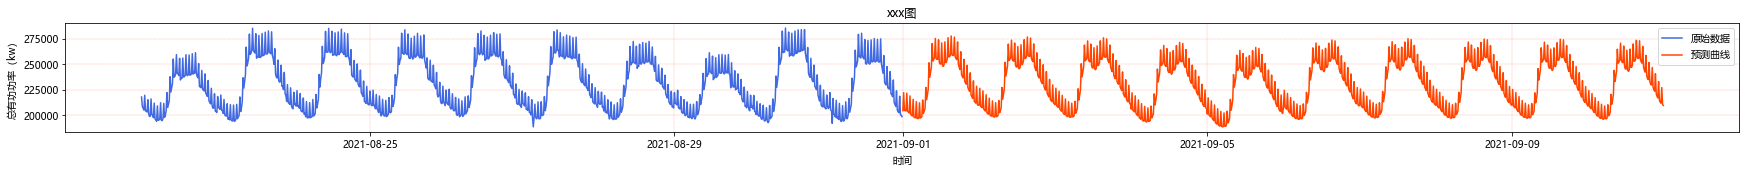

In [26]:
plt.rcParams['font.sans-serif'] = ['Microsoft Yahei']
plt.figure(figsize=(30,2))
plt.grid(color = 'tomato', linestyle = '--', linewidth = 0.25)
plt.title('xxx图')
plt.ylabel('总有功功率（kw）')
plt.xlabel('时间')
plt.plot(data[-960:], color='royalblue', label='原始数据')
plt.plot(predict, color='orangered', label='预测曲线')
plt.legend()
# plt.savefig('每日功率波动曲线去除异常值前后对比图.svg')

In [33]:
predict.to_csv('未来十天功率预测值.csv')